/tmp/ipykernel_18292/2132329502.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


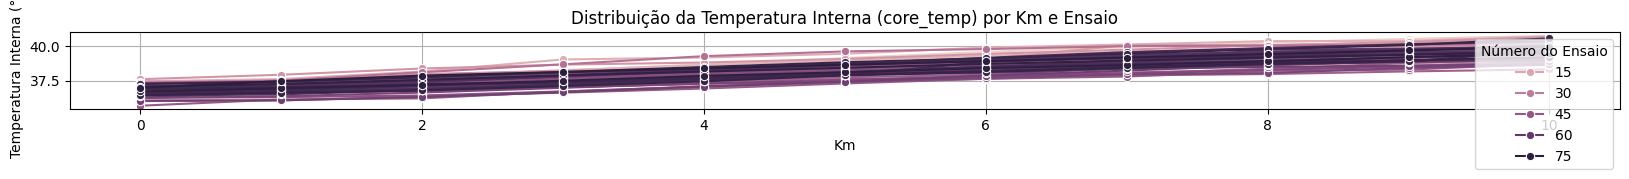

Critério 1 - Homem com temperatura ≈ média geral:
   participant_number   sex  media_temp  media_speed
45                 V9  Male   38.252727       10.801

Critério 2 - Mulher com temperatura ≈ média geral:
   participant_number     sex  media_temp  media_speed
13                V21  Female   38.247273        9.442

Critério 3 - Homem com temperatura acima da média geral:
   participant_number   sex  media_temp  media_speed
0                  V1  Male   39.172727       10.517
1                 V10  Male   39.016364        9.802
2                 V11  Male   38.384545       10.381
9                 V18  Male   38.438182       13.936
10                V19  Male   38.408182       11.461
12                V20  Male   38.271818       10.361
14                V22  Male   38.299091       12.698
18                V26  Male   38.352727       14.156
20                V28  Male   38.360909       11.677
27                V34  Male   38.311212       10.152
30                V37  Male   38.575758  

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
df = pd.read_csv("/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/processed-data/raw-data-long-1-1km.csv")  

# ----------- PREPARAÇÃO DOS DADOS -----------
# Garantindo tipos corretos
df['participant_number'] = df['participant_number'].astype(str)
df['sex'] = df['sex'].str.strip().str.capitalize()

# Removendo linhas com core_temp nulo
df = df.dropna(subset=['core_temp'])

# ----------- PLOTAGEM: Distribuição da Temperatura Interna por Km e Ensaio -----------

plt.figure(figsize=(20, 1))
sns.lineplot(data=df, x="kilometer", y="core_temp", hue="trial_number", marker='o')
plt.title("Distribuição da Temperatura Interna (core_temp) por Km e Ensaio")
plt.xlabel("Km")
plt.ylabel("Temperatura Interna (°C)")
plt.legend(title="Número do Ensaio")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- ANÁLISES ESTATÍSTICAS -----------
# Média geral de temperatura e velocidade
media_temp_geral = df.groupby(['participant_number'])['core_temp'].mean().mean()
media_speed_geral = df['speed'].mean()

# Agrupamento por participante
df_part = df.groupby(['participant_number', 'sex']).agg(
    media_temp=('core_temp', 'mean'),
    media_speed=('speed', 'mean')
).reset_index()

# ----------- CRITÉRIOS DE SELEÇÃO -----------

# 1. Homem com temperatura igual à média geral
criterio_1 = df_part[
    (df_part['sex'] == 'Male') &
    (df_part['media_temp'].round(2) == round(media_temp_geral, 2))
]

# 2. Mulher com temperatura igual à média geral
criterio_2 = df_part[
    (df_part['sex'] == 'Female') &
    (df_part['media_temp'].round(2) == round(media_temp_geral, 2))
]

# 3. Homem com temperatura acima da média geral (possível risco >40 °C)
criterio_3 = df_part[
    (df_part['sex'] == 'Male') &
    (df_part['media_temp'] > media_temp_geral)
]

# 4. Homem com maior média de velocidade
criterio_4 = df_part[
    (df_part['sex'] == 'Male') &
    (df_part['media_speed'] == df_part[df_part['sex'] == 'Male']['media_speed'].max())
]

# 5. Homem com menor média de velocidade
criterio_5 = df_part[
    (df_part['sex'] == 'Male') &
    (df_part['media_speed'] == df_part[df_part['sex'] == 'Male']['media_speed'].min())
]

# ----------- RESULTADOS -----------
print("Critério 1 - Homem com temperatura ≈ média geral:")
print(criterio_1)

print("\nCritério 2 - Mulher com temperatura ≈ média geral:")
print(criterio_2)

print("\nCritério 3 - Homem com temperatura acima da média geral:")
print(criterio_3)

print("\nCritério 4 - Homem mais rápido (velocidade média mais alta):")
print(criterio_4)

print("\nCritério 5 - Homem mais lento (velocidade média mais baixa):")
print(criterio_5)


/tmp/ipykernel_284351/652188325.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


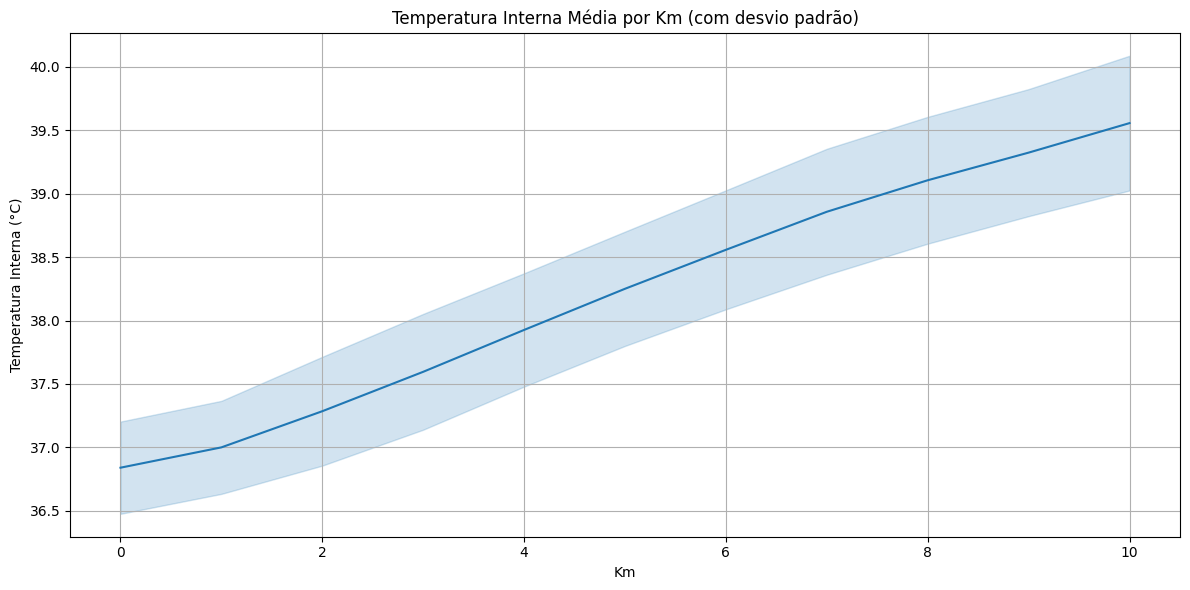

In [ ]:
#media e desvio padrao da tempertura interna ao longo dos km
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="kilometer",
    y="core_temp",
    ci="sd",  # intervalo de confiança com desvio padrão
    estimator="mean"
)
plt.title("Temperatura Interna Média por Km (com desvio padrão)")
plt.xlabel("Km")
plt.ylabel("Temperatura Interna (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


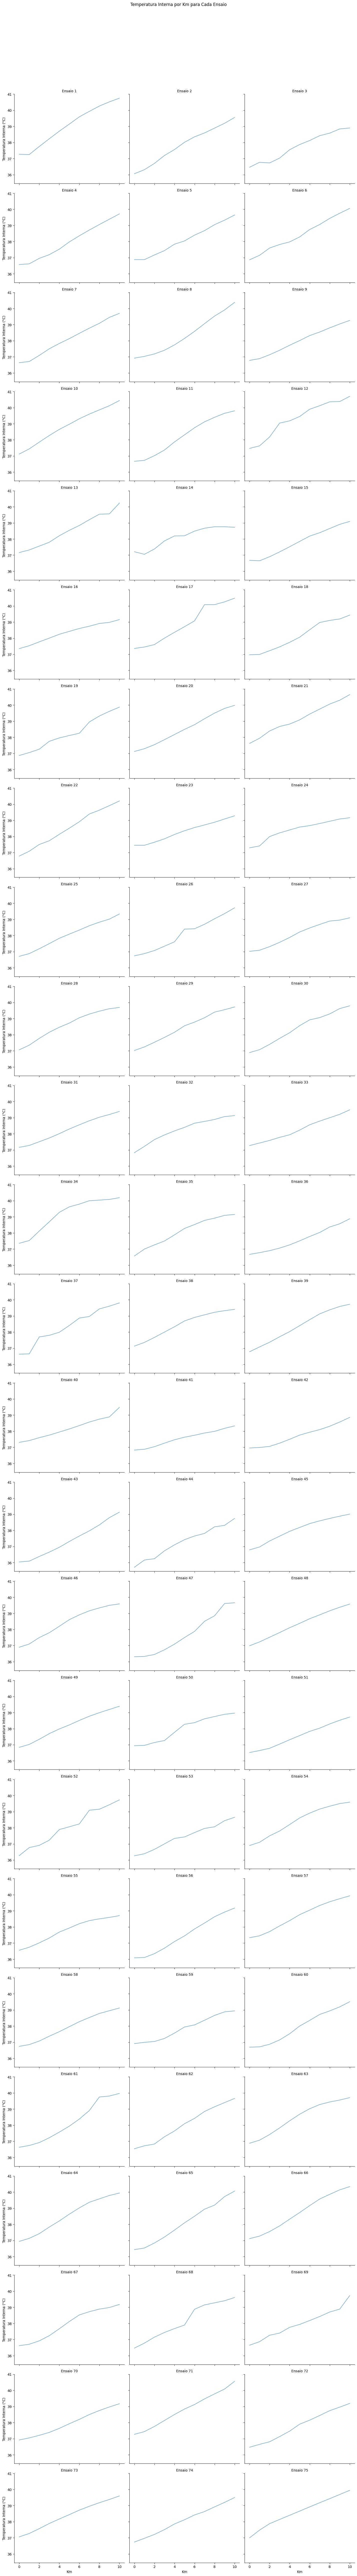

In [ ]:
#grafico de todos os individuos
g = sns.FacetGrid(df, col="trial_number", col_wrap=3, height=4, aspect=1.2)
g.map_dataframe(sns.lineplot, x="kilometer", y="core_temp", hue="participant_number", legend=False, alpha=0.6)
g.set_titles("Ensaio {col_name}")
g.set_axis_labels("Km", "Temperatura Interna (°C)")
g.fig.suptitle("Temperatura Interna por Km para Cada Ensaio", y=1.03)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np

# Carregue o CSV
df = pd.read_csv('/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/processed-data/raw-data-long-1-1km.csv')

# Considere apenas os km de 1 a 10 (não o km 0)
df_km = df[df['kilometer'].between(1, 10)]

# Média geral de temperatura interna e de velocidade
mean_core_temp_total = df_km['core_temp'].mean()
mean_speed_total = df_km['speed'].mean()

# Agrupe por indivíduo
indiv = df_km.groupby(['participant_number', 'sex']).agg({
    'core_temp': 'mean',
    'speed': 'mean'
}).reset_index()

# 1) Homem cuja média de core_temp é mais próxima da média geral
homem_mais_proximo_media_temp = indiv[indiv['sex'] == 'Male'].iloc[(indiv[indiv['sex'] == 'Male']['core_temp'] - mean_core_temp_total).abs().argsort()].head(1)

# 2) Mulher cuja média de core_temp é mais próxima da média geral
mulher_mais_proxima_media_temp = indiv[indiv['sex'] == 'Female'].iloc[(indiv[indiv['sex'] == 'Female']['core_temp'] - mean_core_temp_total).abs().argsort()].head(1)

# 3) Homem com média de core_temp acima da média geral (e provavelmente >40°C no km 10)
homens_acima_media = indiv[(indiv['sex'] == 'Male') & (indiv['core_temp'] > mean_core_temp_total)]
# Para garantir que termina acima de 40°C:
df_km10 = df[df['kilometer'] == 10]
homens_km10_40 = df_km10[(df_km10['sex'] == 'Male') & (df_km10['core_temp'] >= 40)]
# Junte com os homens acima da média
homem_criterio_3 = homens_acima_media[homens_acima_media['participant_number'].isin(homens_km10_40['participant_number'])]

# 4) Homem mais rápido (maior média de speed)
homem_mais_rapido = indiv[indiv['sex'] == 'Male'].sort_values('speed', ascending=False).head(1)

# 5) Homem mais lento (menor média de speed)
homem_mais_lento = indiv[indiv['sex'] == 'Male'].sort_values('speed', ascending=True).head(1)

# Resultados:
print("1) Homem com média de temp. interna igual à média geral:\n", homem_mais_proximo_media_temp)
print("2) Mulher com média de temp. interna igual à média geral:\n", mulher_mais_proxima_media_temp)
print("3) Homem com média de temp. interna acima da média e termina >40°C:\n", homem_criterio_3)
print("4) Homem mais rápido:\n", homem_mais_rapido)
print("5) Homem mais lento:\n", homem_mais_lento)

1) Homem com média de temp. interna igual à média geral:
    participant_number   sex  core_temp  speed
41                 V5  Male     38.341  9.331
2) Mulher com média de temp. interna igual à média geral:
    participant_number     sex  core_temp  speed
13                V21  Female     38.389  9.442
3) Homem com média de temp. interna acima da média e termina >40°C:
    participant_number   sex  core_temp    speed
0                  V1  Male    39.3530  10.5170
1                 V10  Male    39.1810   9.8020
2                 V11  Male    38.5505  10.3810
11                 V2  Male    38.3565  10.2315
30                V37  Male    38.7190  13.1980
36                V42  Male    38.9680  14.9430
42                 V6  Male    38.7995  12.4070
44                 V8  Male    38.4545  12.1390
4) Homem mais rápido:
    participant_number   sex  core_temp   speed
36                V42  Male     38.968  14.943
5) Homem mais lento:
    participant_number   sex  core_temp  speed
41       

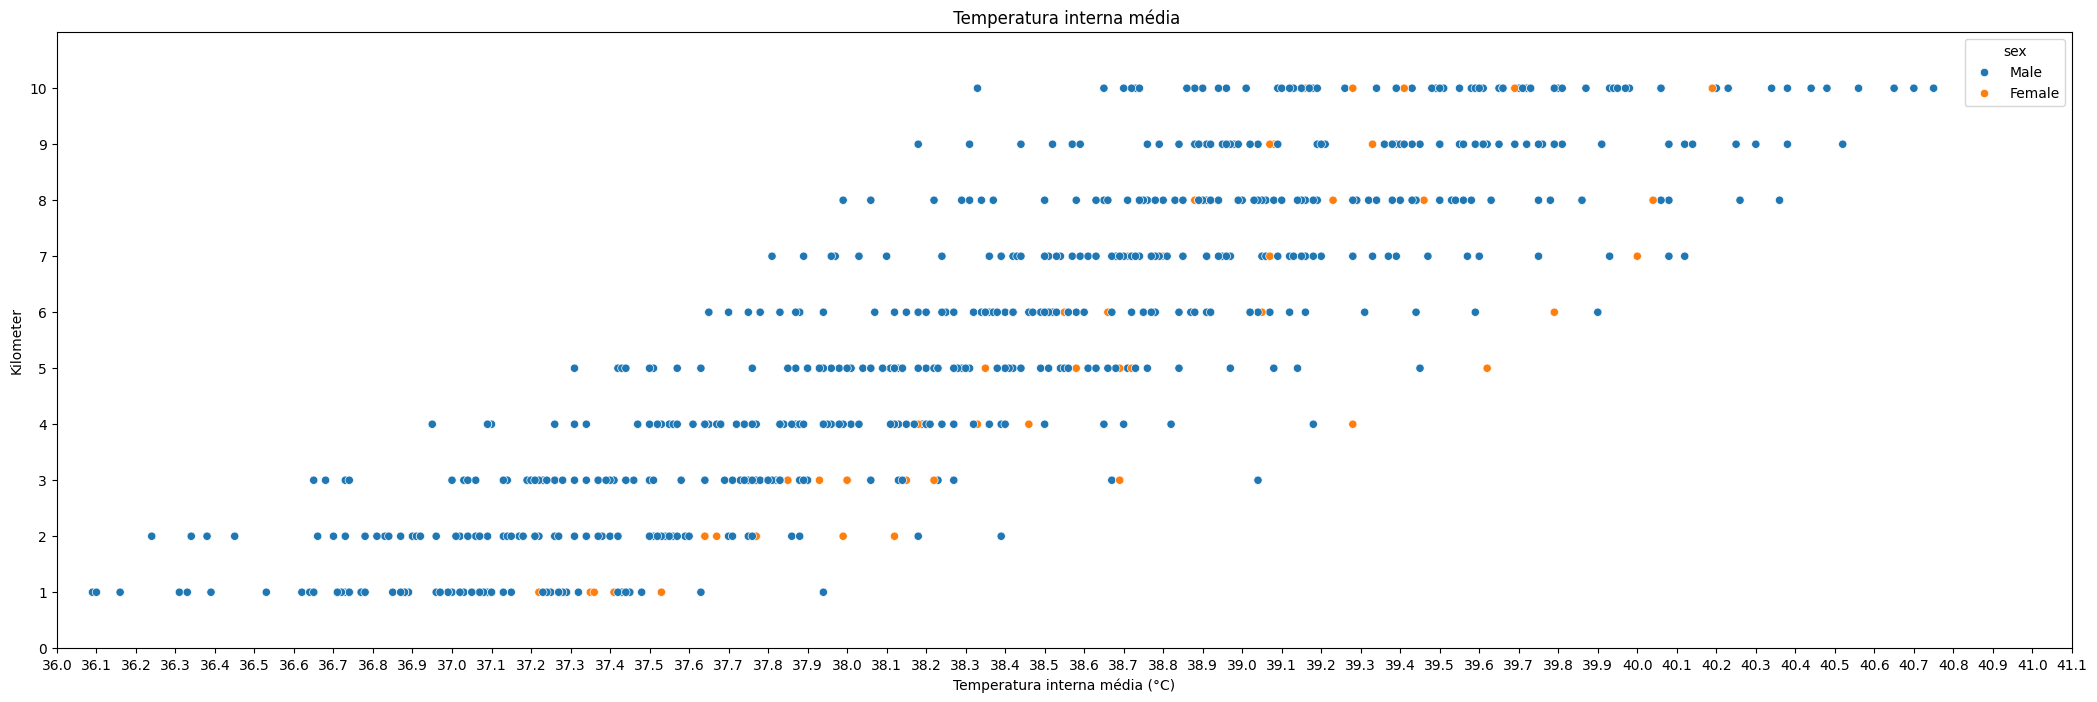

In [4]:
plt.figure(figsize=(26, 8))
ax = plt.gca() 
sns.scatterplot(data=df_km, x='core_temp', y='kilometer', hue='sex')
plt.title(' Temperatura interna média')
plt.xlabel('Temperatura interna média (°C)')
plt.ylabel('Kilometer')
ax.set_ylim(0, 11)
ax.set_xlim(36, 41)
ax.set_yticks(range(0, 11, 1))
ax.set_xticks(np.arange(36, 41.1, 0.1))
plt.show()

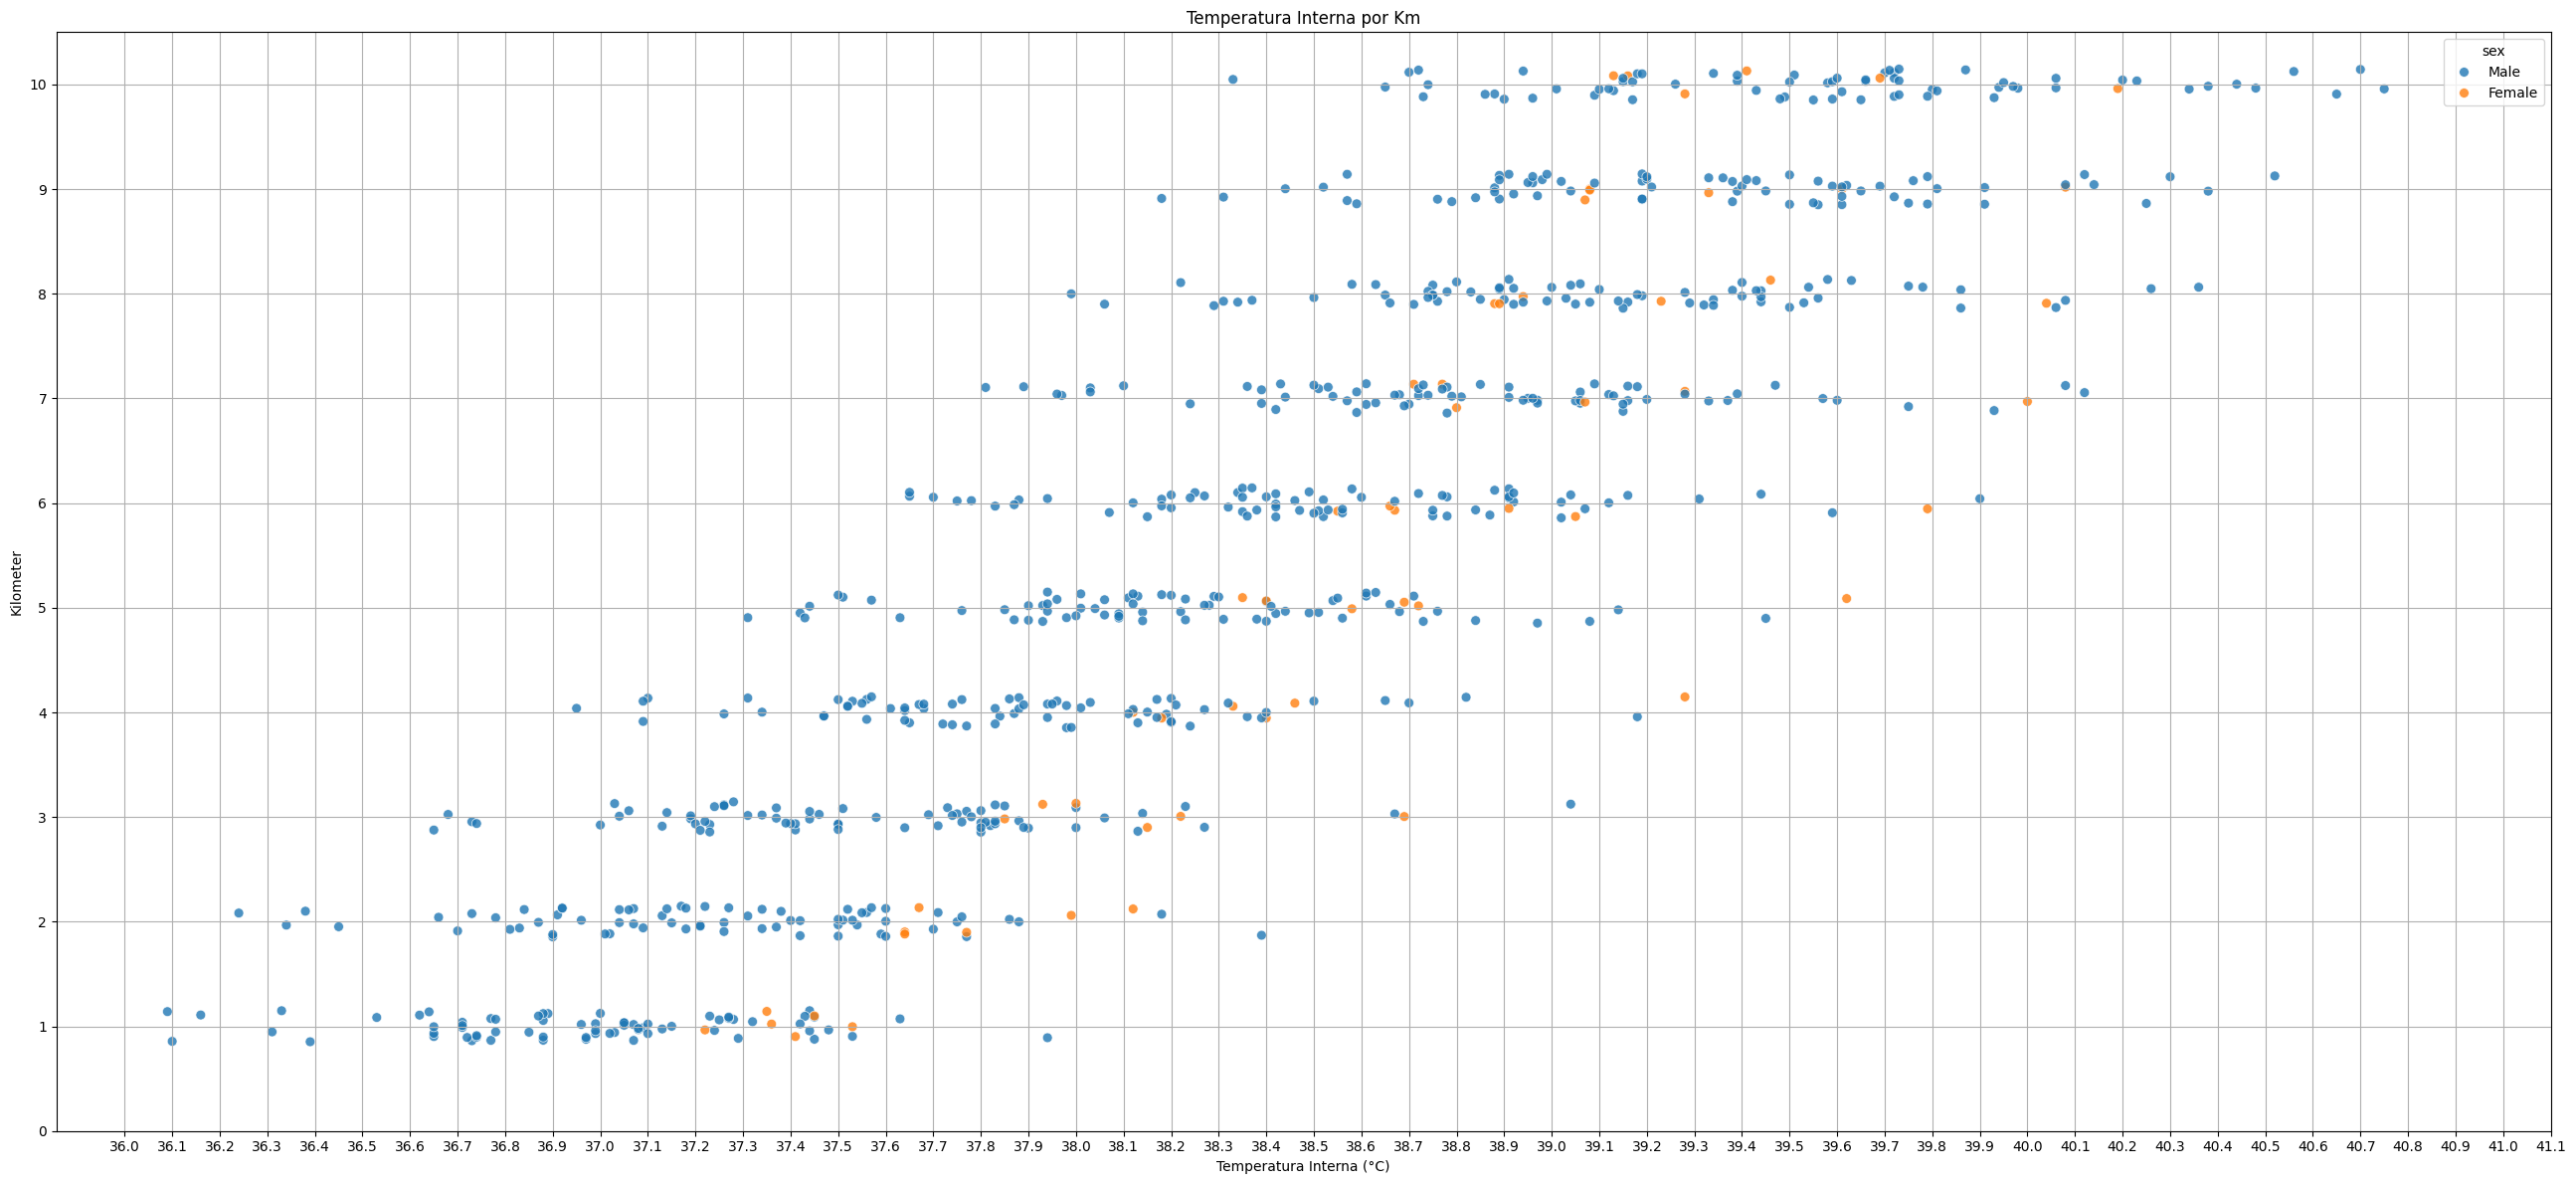

In [5]:
# grafico de dispersao de tempertura interna ao longo dos 10 km
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copiando os dados para não alterar o original
df_km_jitter = df_km.copy()

# Adicionando jitter no eixo Y (kilometer) — ruído entre -0.15 e +0.15
df_km_jitter['kilometer_jittered'] = df_km_jitter['kilometer'] + np.random.uniform(-0.15, 0.15, size=len(df_km_jitter))

# Plotando com seaborn
plt.figure(figsize=(26, 12))
ax = plt.gca()

sns.scatterplot(data=df_km_jitter, x='core_temp', y='kilometer_jittered', hue='sex', alpha=0.8, s=50)

# Ajustes do gráfico
ax.set_ylim(0, 10.5)
ax.set_yticks(range(0, 11, 1))
ax.set_yticklabels(range(0, 11, 1))  # Mostra apenas os valores inteiros como rótulo
ax.set_xticks(np.arange(36, 41.1, 0.1))

plt.title('Temperatura Interna por Km')
plt.xlabel('Temperatura Interna (°C)')
plt.ylabel('Kilometer')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Carregue o CSV
df = pd.read_csv('/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/processed-data/raw-data-long-1-1km.csv')

# Considere apenas os km de 1 a 10
df_km = df[df['kilometer'].between(1, 10)]

In [8]:
# Agrupe por trial_number (cada trial é um indivíduo)
grouped = df_km.groupby('trial_number').agg({
    'core_temp': 'mean',
    'speed': 'mean',
    'sex': 'first',
}).reset_index()


In [9]:
# Médias gerais considerando todos os trials
mean_core_temp_total = grouped['core_temp'].mean()
mean_speed_total = grouped['speed'].mean()

In [10]:
print("Média geral de core_temp:", mean_core_temp_total)
print("Média geral de speed:", mean_speed_total)

Média geral de core_temp: 38.345533333333336
Média geral de speed: 11.4246


In [11]:
# 1) Homem que tem a média de core_temp mais próxima da média geral
homem_mais_proximo_media_temp = grouped[grouped['sex'] == 'Male'].iloc[(grouped[grouped['sex'] == 'Male']['core_temp'] - mean_core_temp_total).abs().argsort()].head(1)
print("1) Homem com média de temp. interna igual à média geral:\n", homem_mais_proximo_media_temp)
# A justificativa da escolha deste indivíduo é que sua média de temperatura interna está mais próxima da média geral
# e dado que a melhor previsao que o modelo pode fazer é a média, este indivíduo representa melhor o comportamento médio 
# dos homens no estudo. 

1) Homem com média de temp. interna igual à média geral:
     trial_number  core_temp  speed   sex
67            68     38.328  9.713  Male


In [12]:
# 2) Mulher que tem média de core_temp mais próxima da média geral
mulher_mais_proxima_media_temp = grouped[grouped['sex'] == 'Female'].iloc[(grouped[grouped['sex'] == 'Female']['core_temp'] - mean_core_temp_total).abs().argsort()].head(1)
print("2) Mulher com média de temp. interna igual à média geral:\n", mulher_mais_proxima_media_temp)
# A justificativa da escolha deste indivíduo é que sua média de temperatura interna está mais próxima da média geral
# e dado que a melhor previsao que o modelo pode fazer é a média, apesar de ser uma mulher.

2) Mulher com média de temp. interna igual à média geral:
     trial_number  core_temp  speed     sex
31            32     38.389  9.442  Female


In [13]:
# 3) Homem com média de core_temp acima da média geral E termina >40°C
# Pega o core_temp do km 10 (por trial)
km10 = df[df['kilometer'] == 10][['trial_number', 'core_temp']]
km10 = km10.set_index('trial_number')
homens_acima_media = grouped[(grouped['sex'] == 'Male') & (grouped['core_temp'] > mean_core_temp_total)]
homens_km10_40 = homens_acima_media.merge(km10, left_on='trial_number', right_index=True)
homem_criterio_3 = homens_km10_40[homens_km10_40['core_temp_y'] > 40].head(1)
print("3) Homem com média de temp. interna acima da média e termina >40°C:\n", homem_criterio_3)
# Ajustificativa da escolha deste individuo é que ele além de ter uma média de temperatura interna acima da média geral, termina 
# o ensiao com temperatura interna acima de 40°C, o que pode prejudicar a predicao da temperatura interna pelo modelo.

3) Homem com média de temp. interna acima da média e termina >40°C:
    trial_number  core_temp_x   speed   sex  core_temp_y
0             1       39.212  10.072  Male        40.75


In [14]:
# 4) Homem mais rápido (maior média de speed)
homem_mais_rapido = grouped[grouped['sex'] == 'Male'].sort_values('speed', ascending=False).head(1)
print("4) Homem mais rápido:\n", homem_mais_rapido)

4) Homem mais rápido:
     trial_number  core_temp   speed   sex
70            71     38.968  14.943  Male


In [15]:
# 5) Homem mais lento (menor média de speed)
homem_mais_lento = grouped[grouped['sex'] == 'Male'].sort_values('speed', ascending=True).head(1)
print("5) Homem mais lento:\n", homem_mais_lento)

5) Homem mais lento:
     trial_number  core_temp  speed   sex
15            16     38.434  8.815  Male
